In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [4]:
def draw_line_plot():
    # Draw line plot
    fig,ax = plt.subplots(figsize=(15, 5))    
    ax.plot(df.index, df['value'], color = 'red') 
    ax.set(xlabel='Date',
    ylabel='Page Views',
    title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

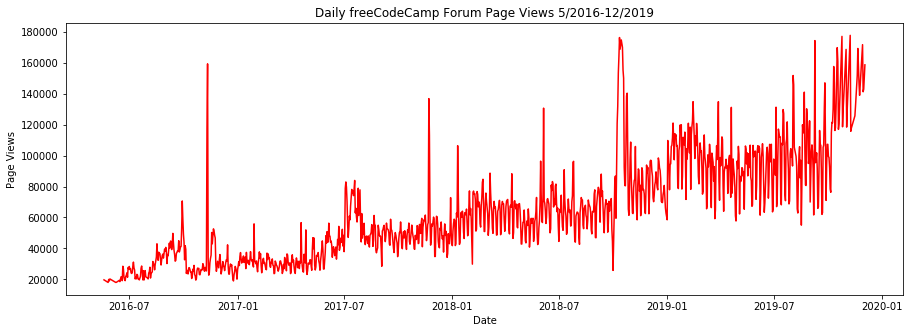

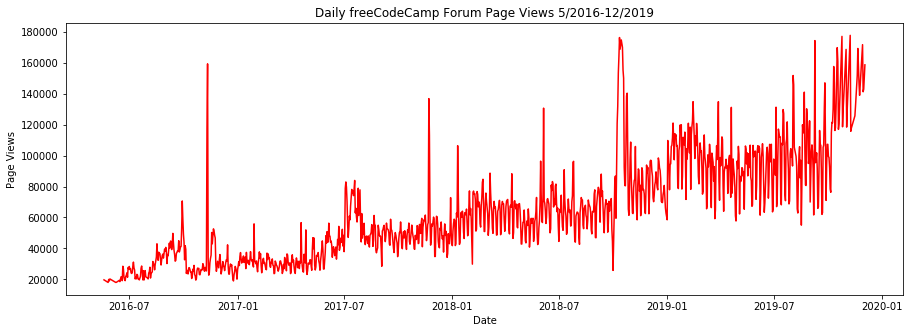

In [5]:
draw_line_plot()

In [6]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = pd.DataFrame(df)
    df_bar['Years'] = df_bar.index.year
    df_bar['Months'] = df_bar.index.month
    df_bar = df_bar.groupby(["Years","Months"])["value"].mean().unstack()
    df_bar.fillna(0)
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    
    # Draw bar plot
    fig=df_bar.plot(kind ="bar",  figsize = (12,7)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months', labels = months)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

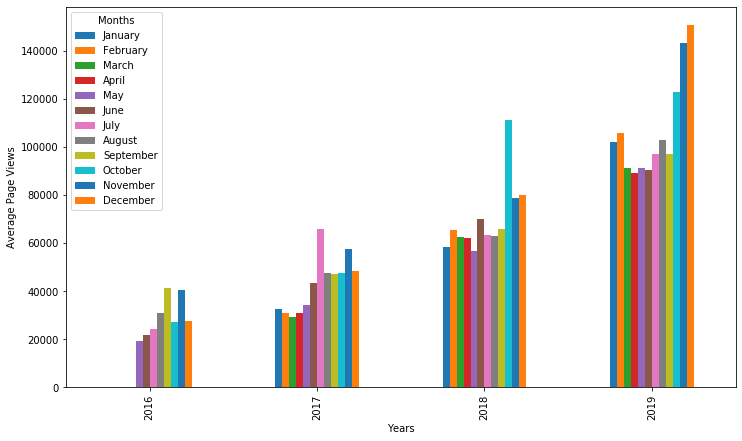

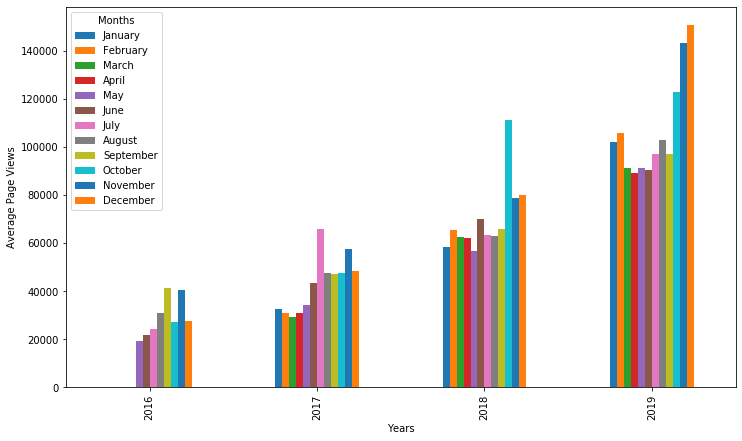

In [7]:
draw_bar_plot()

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box.sort_values(by=['year','date'],ascending=[False,True],inplace=True)
    
    # Draw box plots (using Seaborn)
    fig, (ax_y, ax_m) = plt.subplots(1,2,figsize=(15, 5))

    ax_y = sns.boxplot(data=df_box, x='year', y='value', ax=ax_y)
    ax_y.set(xlabel='Year',
        ylabel='Page Views',
        title='Year-wise Box Plot (Trend)')
    
    ax_m = sns.boxplot(data=df_box, x='month', y='value', ax=ax_m)
    ax_m.set(xlabel='Month',
        ylabel='Page Views',
        title='Month-wise Box Plot (Seasonality)')

    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

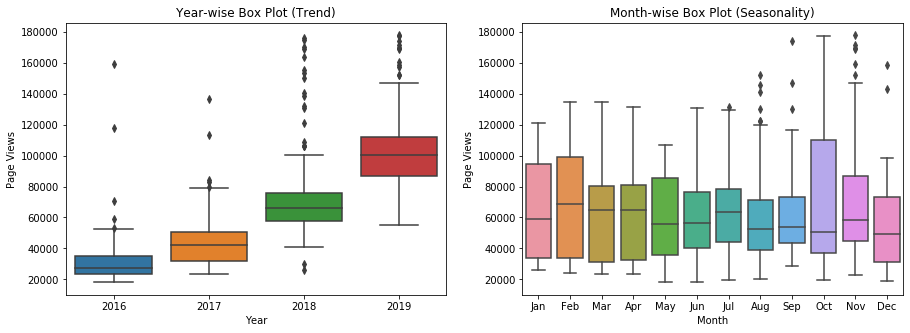

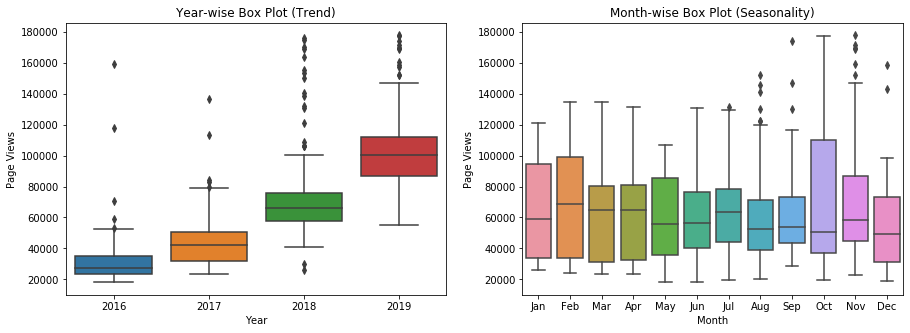

In [9]:
draw_box_plot()